In [1]:
using Plots

include("src/PolyColoid.jl")
using .PolyColoid

In [2]:
coloid = Coloid(144, 4, 1 / √2, (20, 20))
crystal_initialize!(coloid, 12, (20/12, 20/12), (20/24, 20/24))

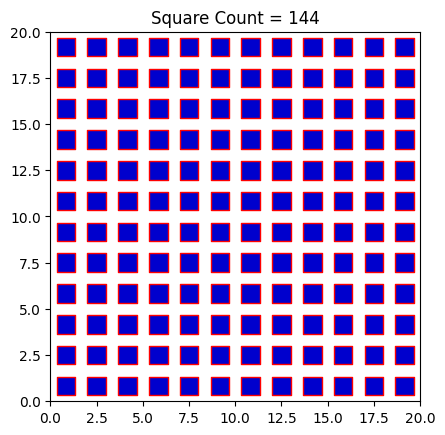

In [3]:
using PyPlot: matplotlib
import PyPlot as plt

const PatchCollection = matplotlib.collections.PatchCollection
plt.svg(true)

function get_patch(square)
    θ = acos(square.normals[1])
    side_angle = θ + π/4
    side_shift = √2 * square.bisector * [cos(side_angle), sin(side_angle)]
    return matplotlib.patches.Rectangle(square.center .- side_shift, 2square.bisector,
        2square.bisector, angle=rad2deg(θ), fc="mediumblue", ec="red")
end

fig, ax = plt.subplots()

ax.add_collection(PatchCollection([get_patch(particle) for particle in coloid.particles], match_original=true))
ax.set_title("Square Count = $(length(coloid.particles))")

ax.set_xlim(0.0, 20)
ax.set_ylim(0.0, 20)
ax.set_aspect("equal")
# plt.savefig("rnddist_square.pdf", bbox_inches="tight")
# plt.savefig("rnddist_square.png", bbox_inches="tight")
display(fig)
plt.close()

In [5]:
mcsimulate_periodic!(coloid, 20/24, π/2, 1000)
mcsimulate_periodic!(coloid, 20/24, π/2, 1000)

(0.3163064833005894, 0.879837067209776)